In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from src.utils import autoregressive, moving_average, arima
from src.ploting import LinearPlot
from src.forecast import  NaiveAVG, NaiveLast, NaiveSeasonal, NaiveDrift

## Metody naiwne

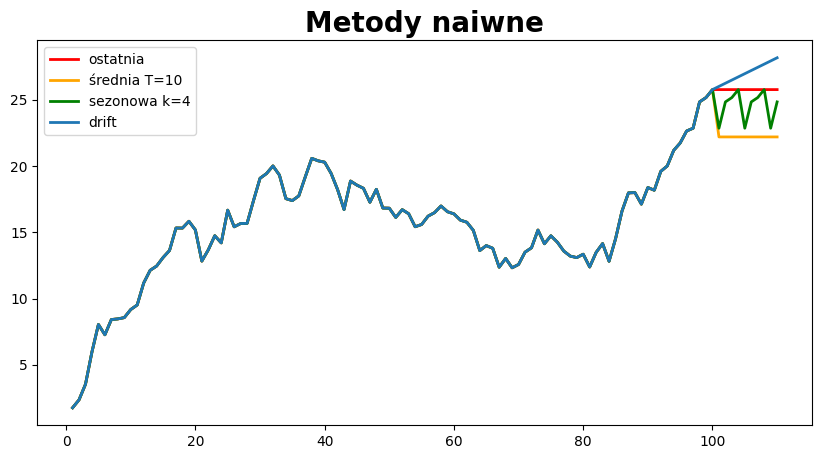

In [2]:
ar1 = autoregressive(n=100, seed=0, start=0, order=1, ro=[1], c=0.2)
ar1_f_last = NaiveLast(values=ar1, h=10).predict()
ar1_f_avg = NaiveAVG(values=ar1, h=10, T=10).predict()
ar1_f_sns = NaiveSeasonal(values=ar1, h=10, k=4).predict()
ar1_f_drift = NaiveDrift(values=ar1, h=10).predict()


x = np.linspace(1, len(ar1_f_last), num=len(ar1_f_last))
lp = LinearPlot(title="Metody naiwne")
lp.plot_linear(x, ar1_f_last, label="ostatnia", color="red")
lp.plot_linear(x, ar1_f_avg, label="średnia T=10", color="orange") 
lp.plot_linear(x, ar1_f_sns, label="sezonowa k=4", color="green")
lp.plot_linear(x, ar1_f_drift, label="drift")
plt.legend()

## ARIMA

Szereg stacjonarny

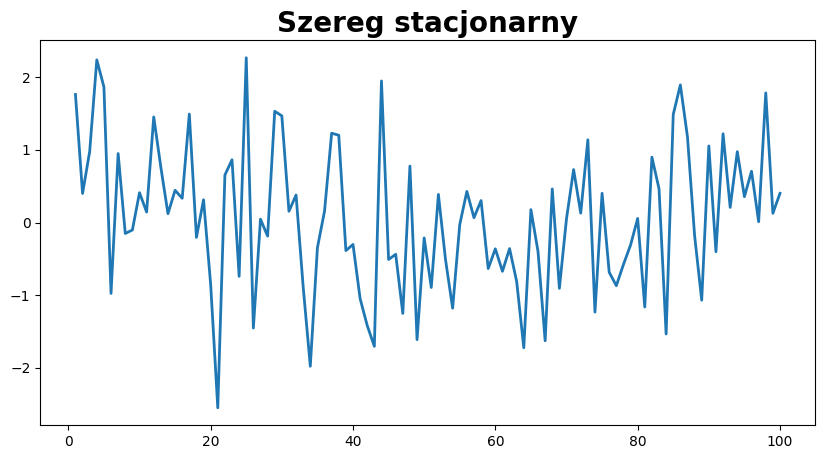

In [4]:
stat = autoregressive(n=100, seed=0, start=0, order=1, ro=[0], c=0)
x = np.linspace(1, len(stat), num=len(stat))
lp = LinearPlot(title="Szereg stacjonarny", legend=False).plot_linear(x, stat)

Szereg niestacjonarny

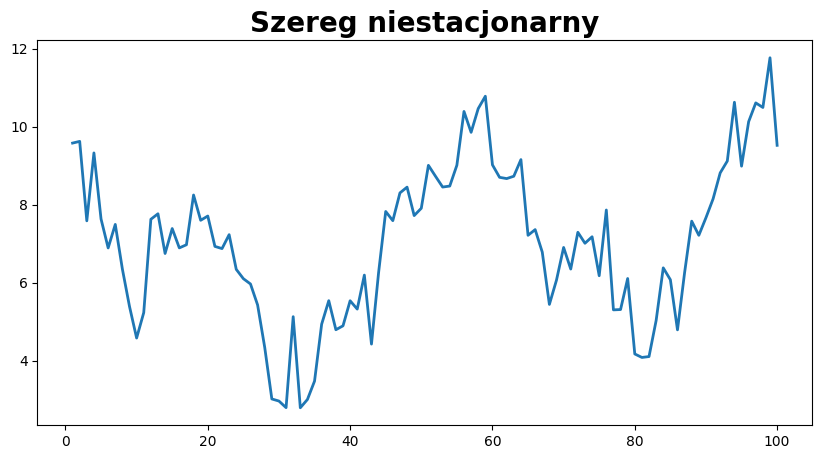

In [6]:
non_stat = autoregressive(n=100, seed=2, start=10, order=1, ro=[1], c=0.1)
x = np.linspace(1, len(non_stat), num=len(non_stat))
lp = LinearPlot(title="Szereg niestacjonarny", legend=False).plot_linear(x, non_stat)

Szereg niestacjonarny po zróżnicowaniu

<Axes: title={'center': 'Szereg niestacjonarny po zróżnicowaniu'}>

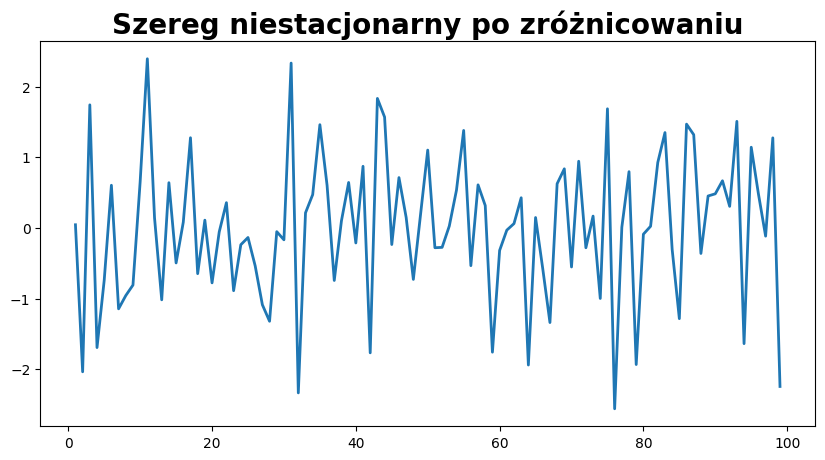

In [8]:
non_stat_diff_1 = np.diff(non_stat, 1)
x = np.linspace(1, len(non_stat_diff_1), num=len(non_stat_diff_1))
LinearPlot(title="Szereg niestacjonarny po zróżnicowaniu", legend=False).plot_linear(x, non_stat_diff_1)

Szereg AR(1)

<Axes: title={'center': 'Szereg AR(1)'}>

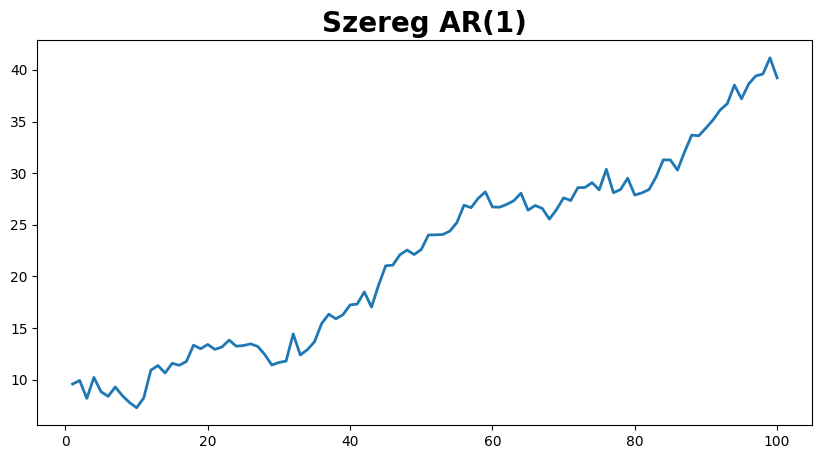

In [9]:
ar1 = autoregressive(n=100, seed=2, start=10, order=1, ro=[1], c=0.4)
x = np.linspace(1, len(ar1), num=len(ar1))
LinearPlot(title="Szereg AR(1)", legend=False).plot_linear(x, ar1)

Szereg AR(2)

yt = 0.4 

<Axes: title={'center': 'Szereg AR(2)'}>

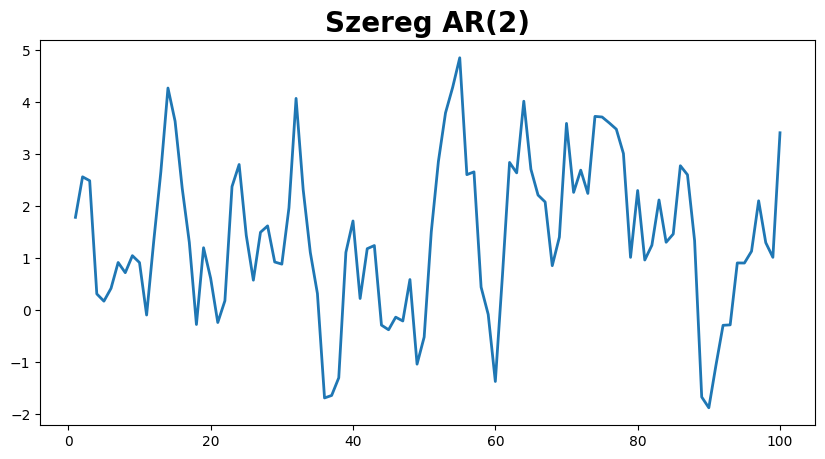

In [10]:
ar2 = autoregressive(n=100, seed=3, start=0, order=2, ro=[0.8, -0.2], c=0.7)
x = np.linspace(1, len(ar2), num=len(ar2))
LinearPlot(title="Szereg AR(2)", legend=False).plot_linear(x, ar2)

Szereg MA(1)

<Axes: title={'center': 'Szereg MA(1)'}>

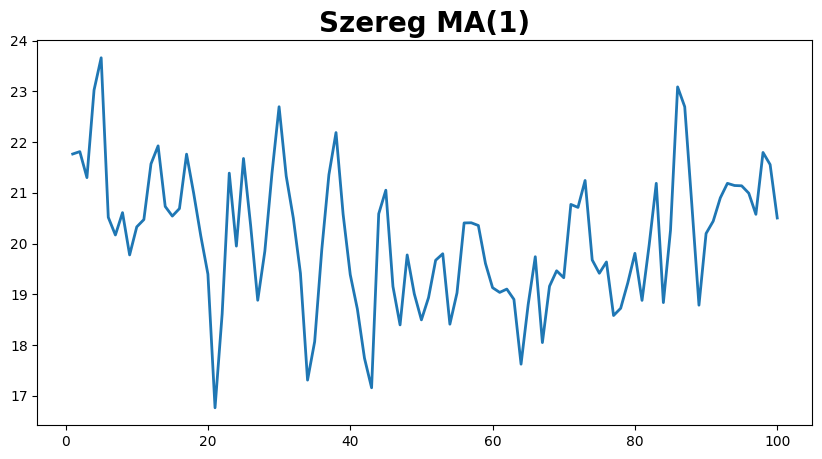

In [11]:
ma1 = moving_average(n=100, seed=0, start=0, order=1, ro=[0.8], c=20)
x = np.linspace(1, len(ma1), num=len(ma1))
LinearPlot(title="Szereg MA(1)", legend=False).plot_linear(x, ma1)

Szereg MA(2)

<Axes: title={'center': 'Szereg MA(2)'}>

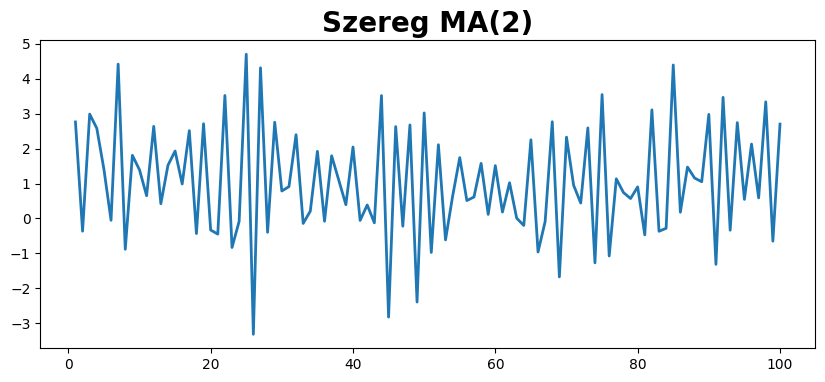

In [2]:
ma2 = moving_average(n=100, seed=0, start=0, order=2, ro=[-1, 0.8], c=1)
x = np.linspace(1, len(ma2), num=len(ma2))
LinearPlot(title="Szereg MA(2)", legend=False).plot_linear(x, ma2)

ARIMA

<Axes: title={'center': 'ARIMA(2, 0, 1)'}>

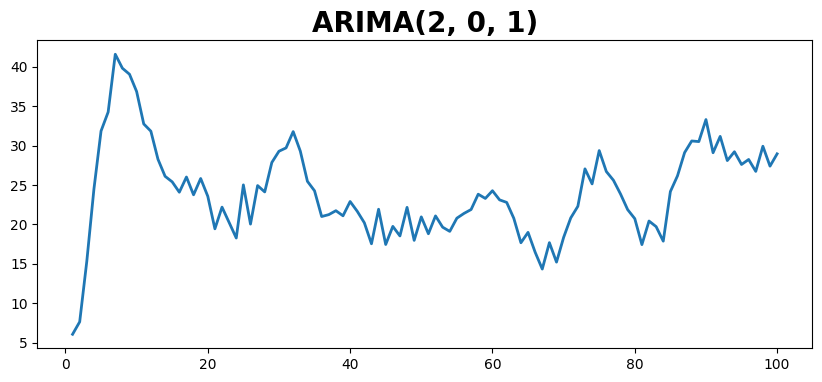

In [3]:
arima1 = arima(n=100, p=2, d=0, q=1, ar_ro=[1.68, -0.8], ma_ro=[-0.69], c=2.56)
x = np.linspace(1, len(arima1), num=len(arima1))
LinearPlot(title="ARIMA(2, 0, 1)", legend=False).plot_linear(x, arima1)